In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [38]:
sns.set(style="whitegrid")

In [39]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/ML/Mall_Customers.csv')

In [40]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [41]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [42]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [43]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [44]:
print("\nMissing Values in each column:")
print(df.isnull().sum())


Missing Values in each column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


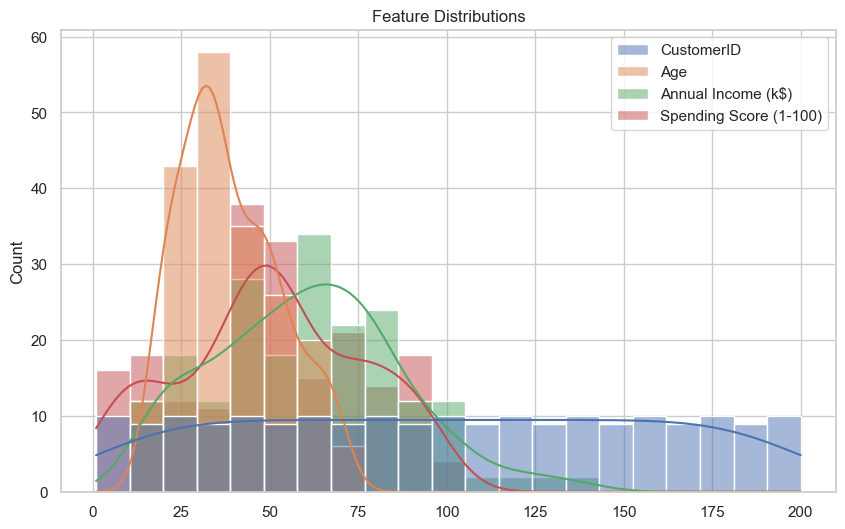

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, kde=True)
plt.title("Feature Distributions")
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [47]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

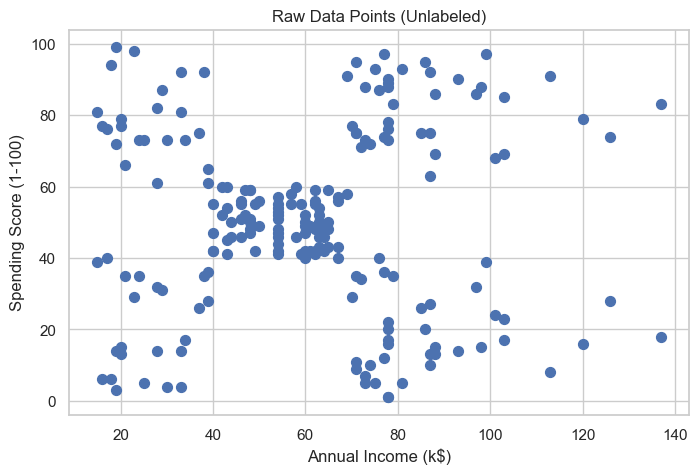

In [48]:
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50)
plt.title("Raw Data Points (Unlabeled)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

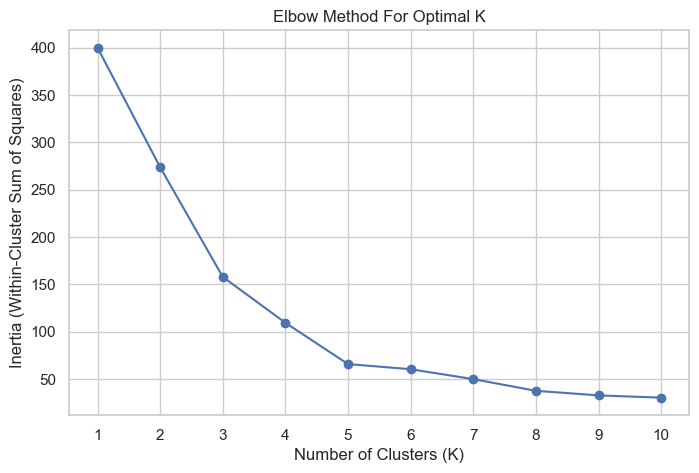

In [51]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.show()

k = 5 beacuse after cluster = 5 there no more difference in inertia 

In [52]:
optimal_k = 5   
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

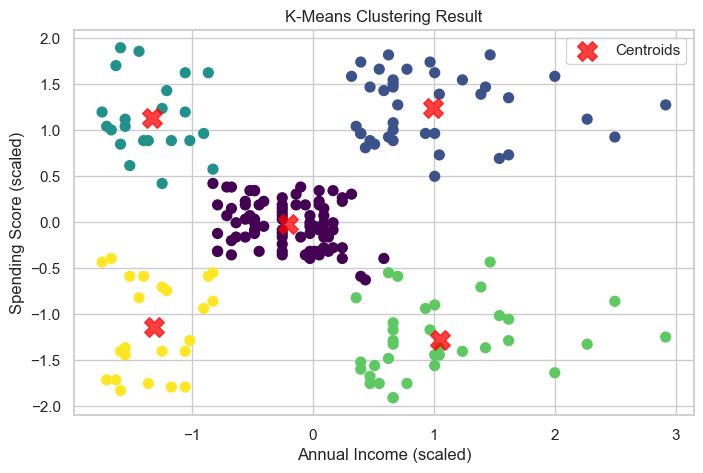

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Result")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

Each color represents a different group of customers based on spending score and income. These clusters help in:

Understanding customer behavior

Targeting marketing strategies



In [54]:
print("Cluster Centers (in scaled space):")
print(centers)

Cluster Centers (in scaled space):
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [55]:
print("\nFirst 10 Predicted Cluster Labels:")
print(y_kmeans[:10])


First 10 Predicted Cluster Labels:
[4 2 4 2 4 2 4 2 4 2]


Conclusion:
Using KMeans clustering, the data was divided into 5 distinct customer segments based on Annual Income and Spending Score.
Each cluster represents a unique group of customers which can be targeted differently for marketing strategies.